In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [ ]:
dataset_link = "https://archive.ics.uci.edu/dataset/222/bank+marketing"

In [4]:
data = pd.read_csv(r"C:\Users\solat\Downloads\bank_edited_file.csv")
data 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,39,blue-collar,married,secondary,no,2299,yes,no,cellular,20,apr,450,1,271,1,failure,no
9038,36,technician,married,secondary,no,58,no,no,cellular,3,feb,24,2,-1,0,unknown,no
9039,49,management,divorced,tertiary,no,178,no,no,cellular,6,aug,174,2,-1,0,unknown,no
9040,38,management,single,tertiary,no,2454,yes,no,cellular,14,aug,373,2,-1,0,unknown,no


In [5]:
data.shape

(9042, 17)

In [6]:
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no


In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9042 non-null   int64 
 1   job        9042 non-null   object
 2   marital    9042 non-null   object
 3   education  9042 non-null   object
 4   default    9042 non-null   object
 5   balance    9042 non-null   int64 
 6   housing    9042 non-null   object
 7   loan       9042 non-null   object
 8   contact    9042 non-null   object
 9   day        9042 non-null   int64 
 10  month      9042 non-null   object
 11  duration   9042 non-null   int64 
 12  campaign   9042 non-null   int64 
 13  pdays      9042 non-null   int64 
 14  previous   9042 non-null   int64 
 15  poutcome   9042 non-null   object
 16  y          9042 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [9]:
cat_cols_name =  df.select_dtypes(include="object").columns
cat_cols_name

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [10]:
num_cols_name = df.select_dtypes(exclude="object").columns
num_cols_name

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
df[cat_cols_name]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,technician,single,tertiary,no,yes,yes,cellular,nov,unknown,no
1,admin.,married,secondary,no,no,no,cellular,nov,failure,no
2,admin.,single,secondary,no,yes,no,cellular,apr,other,no
3,admin.,divorced,secondary,no,yes,no,unknown,may,unknown,no
4,technician,married,secondary,no,yes,no,cellular,jul,unknown,no
...,...,...,...,...,...,...,...,...,...,...
9037,blue-collar,married,secondary,no,yes,no,cellular,apr,failure,no
9038,technician,married,secondary,no,no,no,cellular,feb,unknown,no
9039,management,divorced,tertiary,no,no,no,cellular,aug,unknown,no
9040,management,single,tertiary,no,yes,no,cellular,aug,unknown,no


In [12]:
df[num_cols_name]

,age,balance,day,duration,campaign,pdays,previous
0,35,172,18,52,1,-1,0
1,33,2711,20,184,1,104,1
2,33,745,17,278,2,333,1
3,37,34,9,144,3,-1,0
4,35,1057,21,144,2,-1,0
...,...,...,...,...,...,...,...
9037,39,2299,20,450,1,271,1
9038,36,58,3,24,2,-1,0
9039,49,178,6,174,2,-1,0
9040,38,2454,14,373,2,-1,0


In [13]:
def get_cat_nunique():
    for i in cat_cols_name:
        print(f"{i} has unique vals : {df[i].unique()}")

get_cat_nunique()

job has unique vals : ['technician' 'admin.' 'retired' 'blue-collar' 'services' 'student'
 'management' 'self-employed' 'entrepreneur' 'housemaid' 'unknown'
 'unemployed']
marital has unique vals : ['single' 'married' 'divorced']
education has unique vals : ['tertiary' 'secondary' 'primary' 'unknown']
default has unique vals : ['no' 'yes']
housing has unique vals : ['yes' 'no']
loan has unique vals : ['yes' 'no']
contact has unique vals : ['cellular' 'unknown' 'telephone']
month has unique vals : ['nov' 'apr' 'may' 'jul' 'jun' 'aug' 'sep' 'feb' 'jan' 'oct' 'mar' 'dec']
poutcome has unique vals : ['unknown' 'failure' 'other' 'success']
y has unique vals : ['no' 'yes']


In [14]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9042.000000,9042,9042,9042,9042,9042.000000,9042,9042,9042,9042.000000,9042,9042.000000,9042.000000,9042.000000,9042.000000,9042,9042
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,1941,5396,4630,8858,NaN,5029,7618,5858,NaN,2731,NaN,NaN,NaN,NaN,7362,8003
mean,40.949458,NaN,NaN,NaN,NaN,1362.425238,NaN,NaN,NaN,15.738111,NaN,257.538929,2.736894,41.361203,0.581619,NaN,NaN
std,10.524787,NaN,NaN,NaN,NaN,3098.186676,NaN,NaN,NaN,8.314921,NaN,253.205078,3.098627,101.483634,1.929698,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-3372.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,76.000000,NaN,NaN,NaN,8.000000,NaN,103.250000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,447.000000,NaN,NaN,NaN,16.000000,NaN,182.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1399.000000,NaN,NaN,NaN,21.000000,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [15]:
df1 = df.replace("NaN", np.nan)
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
for i in cat_cols_name:
    print(f"{i} {df[i].nunique()}")

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


In [17]:
import scipy.stats as stat

((array([-3.78564347, -3.55909342, -3.43465063, ...,  3.43465063,
          3.55909342,  3.78564347]),
  array([   0,    3,    4, ..., 2653, 2775, 4918], dtype=int64)),
 (216.09718114324073, 257.5389294403892, 0.8531600876310862))

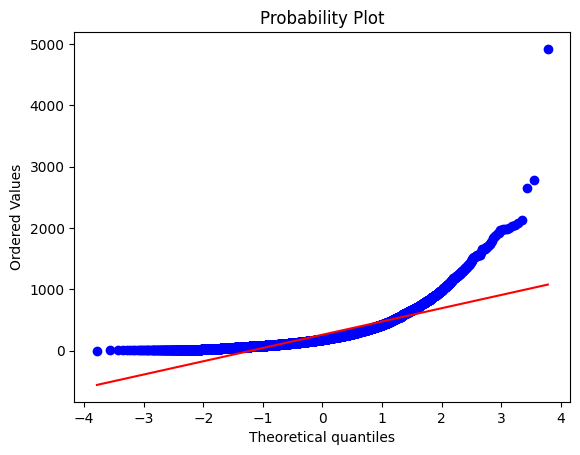

In [18]:
stat.probplot(df["duration"],plot=plt)

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no


In [29]:
education_vs_job = pd.crosstab(df.job, df.education,margins=True,margins_name="Total")
education_vs_job

education,primary,secondary,tertiary,unknown,Total
job,,,,,
admin.,40,809,135,37,1021
blue-collar,735,1085,35,86,1941
entrepreneur,44,107,145,13,309
housemaid,134,77,34,11,256
management,54,216,1561,42,1873
retired,153,192,72,29,446
self-employed,23,125,166,11,325
services,67,708,33,28,836
student,7,104,47,31,189


In [26]:
from scipy.stats import chi2_contingency

stat,p,dof,expected = chi2_contingency(education_vs_job)


In [28]:
stat, p , dof , expected

(5610.768831868242,
 0.0,
 33,
 array([[152.66445477, 522.80800708, 304.42556956,  41.10196859],
        [290.22694094, 993.89847379, 578.73656271,  78.13802256],
        [ 46.20305242, 158.22495023,  92.132714  ,  12.43928334],
        [ 38.27825702, 131.08604291,  76.33001548,  10.30568458],
        [280.05927892, 959.07874364, 558.46140234,  75.40057509],
        [ 66.68790091, 228.37646538, 132.98119885,  17.95443486],
        [ 48.59544349, 166.41782791,  96.90333997,  13.08338863],
        [125.00243309, 428.07785888, 249.26520681,  33.65450122],
        [ 28.26011944,  96.77836762,  56.35301924,   7.6084937 ],
        [230.71621323, 790.10064145, 460.06724176,  62.11590356],
        [ 35.88586596, 122.89316523,  71.55938952,   9.6615793 ],
        [  9.42003981,  32.25945587,  18.78433975,   2.53616457]]))

In [70]:
ALPHA = 0.05

In [95]:
cat_cols_name , len(cat_cols_name)

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object'),
 10)

In [107]:
dictionary = {}
list_of_cols = []

for i in range(len(cat_cols_name)):
    for j in range(i+1, len(cat_cols_name)):

        cross_data = pd.crosstab(df[cat_cols_name[i]], df[cat_cols_name[j]])
        stat, p, dof, expected = chi2_contingency(cross_data)

        if p <= ALPHA:
            list_of_cols.append(cat_cols_name[j])
            # print(list_of_cols)

    dictionary[cat_cols_name[i]] = list_of_cols
    list_of_cols.clear()

print(dictionary)



{'job': [], 'marital': [], 'education': [], 'default': [], 'housing': [], 'loan': [], 'contact': [], 'month': [], 'poutcome': [], 'y': []}


In [96]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no


In [165]:
l = "default contact education month y".split()
X = df.drop(l,axis=1)
y = df["y"]
X.columns

Index(['age', 'job', 'marital', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [174]:
import os 

In [176]:
os.getcwd()

'd:\\Faisal\\Projects\\ucl_bank\\src\\notebook'

In [175]:
save_df = df.drop(l,axis=1)


',age,job,marital,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome\r\n0,35,technician,single,172,yes,yes,18,52,1,-1,0,unknown\r\n1,33,admin.,married,2711,no,no,20,184,1,104,1,failure\r\n2,33,admin.,single,745,yes,no,17,278,2,333,1,other\r\n3,37,admin.,divorced,34,yes,no,9,144,3,-1,0,unknown\r\n4,35,technician,married,1057,yes,no,21,144,2,-1,0,unknown\r\n5,59,retired,married,824,yes,no,28,81,3,-1,0,unknown\r\n6,48,blue-collar,divorced,-18,yes,no,8,11,1,-1,0,unknown\r\n7,45,blue-collar,married,818,yes,no,30,343,3,-1,0,unknown\r\n8,50,services,divorced,622,yes,no,14,93,3,-1,0,unknown\r\n9,48,technician,married,425,yes,no,4,357,4,-1,0,unknown\r\n10,22,student,single,489,no,no,28,223,5,-1,0,unknown\r\n11,74,retired,married,6027,no,no,14,233,2,-1,0,unknown\r\n12,34,management,married,158,no,no,9,278,2,132,4,failure\r\n13,34,management,married,38,no,no,8,52,11,-1,0,unknown\r\n14,26,admin.,single,-235,yes,no,16,103,1,-1,0,unknown\r\n15,33,admin.,married,258,yes,no,5,37,1,-1,0

In [181]:
save_df.to_csv(r"D:\Faisal\Projects\ucl_bank\dataset\final_file.csv",index=False)

In [166]:
cat_col_X = X.select_dtypes(include="object").columns
cat_col_X

Index(['job', 'marital', 'housing', 'loan', 'poutcome'], dtype='object')

In [167]:
for i in cat_col_X:
    print(f"{i} has unique values : {df[i].nunique()}")

job has unique values : 12
marital has unique values : 3
housing has unique values : 2
loan has unique values : 2
poutcome has unique values : 4


In [168]:
df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

# Putting it all together 

In [132]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder ,OrdinalEncoder
from sklearn.pipeline import Pipeline 

In [169]:
cat_col_X

Index(['job', 'marital', 'housing', 'loan', 'poutcome'], dtype='object')

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [171]:
one_hot_col = ["marital", "poutcome"]
ohe_hot_imp = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

ordinal_col = ["job", "housing", "loan"]
ordinal_imp = Pipeline(steps=[
    (("ordinal", OrdinalEncoder()))
])

preprocessor = ColumnTransformer(transformers=[
    ("onehot", ohe_hot_imp,one_hot_col),
    ("ordinal_en", ordinal_imp,ordinal_col)
    ],remainder="passthrough")

transformer = Pipeline(steps=[("preprocessor", preprocessor)])

transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

In [153]:
preprocessor.named_transformers_

{'onehot': Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))]),
 'ordinal_en': Pipeline(steps=[('ordinal', OrdinalEncoder())]),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [159]:
preprocessor.get_feature_names_out()

array(['onehot__marital_divorced', 'onehot__marital_married',
       'onehot__marital_single', 'onehot__poutcome_failure',
       'onehot__poutcome_other', 'onehot__poutcome_success',
       'onehot__poutcome_unknown', 'ordinal_en__job',
       'ordinal_en__housing', 'ordinal_en__loan', 'remainder__age',
       'remainder__balance', 'remainder__day', 'remainder__duration',
       'remainder__campaign', 'remainder__pdays', 'remainder__previous'],
      dtype=object)

# Modelling 

In [172]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(transformed_X_train,y_train)
# rf.score(transformed_X_test,y_test)

RandomForestClassifier()

In [173]:
rf.score(transformed_X_test,y_test)

0.9054726368159204